In [3]:

%matplotlib inline 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "fantasy"
import numpy as np
import random
import scipy
import scipy.misc
import scipy.cluster


from pandas.io.json import json_normalize

In [4]:
df = pd.read_excel('Un.xlsx')
df

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [58]:
#Data Cleaning
df['State'] = df['State Abb.'].map(lambda x:x. split(',')[1])
df.set_index('State', drop=True, append=False, inplace=True, verify_integrity=False) 
State_total = df.groupby('State').sum()
State_total.drop(['2008_(%)', '2009_(%)','2010_(%)','2011_(%)','2012_(%)','2013_(%)','2014_(%)','2015_(%)','2016_(%)','2017_(%)','2018_(%)'], axis=1,inplace= True )
State_total.drop(['Code'], axis=1,inplace= True)
State_total

,2008_Labor,2008_Employed,2008_Unemployed,2009_Labor,2009_Employed,2009_Unemployed,2010_Labor,2010_Employed,2010_Unemployed,2011_Labor,...,2015_Unemployed,2016_Labor,2016_Employed,2016_Unemployed,2017_Labor,2017_Employed,2017_Unemployed,2018_Labor,2018_Employed,2018_Unemployed
State,,,,,,,,,,,,,,,,,,,,,
AK,437653,407825,29828,445640,409135,36505,361911,333415,28496,365916,...,23654,361796,336982,24814,359299,334449,24850,356886,333376,23510
AL,2176491,2053479,123012,2163003,1924749,238254,2196053,1964561,231492,2202672,...,131480,2182566,2055255,127311,2186871,2090378,96493,2198844,2112351,86493
AR,2110513,1990148,120365,2098593,1916898,181695,1353342,1242500,110842,1362694,...,66928,1339533,1286421,53112,1347020,1297215,49805,1351498,1301460,50038
AZ,3044948,2858082,186866,3063773,2758973,304800,3089706,2769454,320252,3037016,...,191815,3236295,3063018,173277,3321563,3160249,161314,3439758,3273553,166205
CA,17655485,16366248,1289237,17691070,15716711,1974359,18336283,16091950,2244333,18415109,...,1168111,19021177,17980079,1041098,19176369,18257104,919265,19357375,18546600,810775
CO,3414047,3243220,170827,3422433,3169713,252720,2724420,2486405,238015,2736084,...,110291,2891689,2796970,94719,2986524,2902753,83771,3096364,2994756,101608
CT,1303001,1230929,72072,1299453,1194826,104627,1911710,1737448,174262,1914775,...,108081,1891785,1794477,97308,1897642,1808329,89313,1905313,1827070,78243
DC,12245,11531,714,12111,10887,1224,346065,313508,32557,350778,...,26797,395021,370897,24124,401021,376716,24305,404739,381703,23036
DE,555631,523702,31929,557911,509898,48013,434419,397869,36550,443347,...,22632,471852,450526,21326,476271,454928,21343,482465,464337,18128


In [59]:
# Find State_total['20XX_Percentage'] = State_total["20XX_Unemployed"] / State_total["20XX_Labor"]*100

for i in range(11):
    State_total[f'{2008+i}'] = State_total.iloc[0:,3*i+2] / State_total.iloc[0:,3*i]*100
State_total




,2008_Labor,2008_Employed,2008_Unemployed,2009_Labor,2009_Employed,2009_Unemployed,2010_Labor,2010_Employed,2010_Unemployed,2011_Labor,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,,,,,,,,,,,
AK,437653,407825,29828,445640,409135,36505,361911,333415,28496,365916,...,8.191590,7.873759,7.583981,7.125954,6.979036,6.864012,6.511374,6.858561,6.916245,6.587538
AL,2176491,2053479,123012,2163003,1924749,238254,2196053,1964561,231492,2202672,...,11.014964,10.541276,9.636387,7.951458,7.219897,6.782291,6.082849,5.833088,4.412377,3.933567
AR,2110513,1990148,120365,2098593,1916898,181695,1353342,1242500,110842,1362694,...,8.657944,8.190243,8.305166,7.568997,7.237353,6.020735,5.026938,3.964964,3.697421,3.702410
AZ,3044948,2858082,186866,3063773,2758973,304800,3089706,2769454,320252,3037016,...,9.948518,10.365129,9.501004,8.337378,7.748358,6.790671,6.062741,5.354178,4.856569,4.831881
CA,17655485,16366248,1289237,17691070,15716711,1974359,18336283,16091950,2244333,18415109,...,11.160201,12.239847,11.713045,10.371119,8.948150,7.500910,6.203863,5.473363,4.793739,4.188455
CO,3414047,3243220,170827,3422433,3169713,252720,2724420,2486405,238015,2736084,...,7.384221,8.736355,8.362974,7.880401,6.851790,5.000048,3.903951,3.275560,2.804967,3.281526
CT,1303001,1230929,72072,1299453,1194826,104627,1911710,1737448,174262,1914775,...,8.051619,9.115504,8.816023,8.348963,7.812584,6.615564,5.721611,5.143713,4.706525,4.106569
DC,12245,11531,714,12111,10887,1224,346065,313508,32557,350778,...,10.106515,9.407770,10.150865,9.042738,8.493128,7.764499,6.886901,6.107017,6.060780,5.691569
DE,555631,523702,31929,557911,509898,48013,434419,397869,36550,443347,...,8.605853,8.413536,7.502250,7.207606,6.687853,5.719315,4.861994,4.519638,4.481272,3.757371


In [8]:
State_total_percentages_only = State_total.iloc[0:, -11:]
State_total_percentages_only

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
AK,6.815445,8.191590,7.873759,7.583981,7.125954,6.979036,6.864012,6.511374,6.858561,6.916245,6.587538
AL,5.651850,11.014964,10.541276,9.636387,7.951458,7.219897,6.782291,6.082849,5.833088,4.412377,3.933567
AR,5.703116,8.657944,8.190243,8.305166,7.568997,7.237353,6.020735,5.026938,3.964964,3.697421,3.702410
AZ,6.136919,9.948518,10.365129,9.501004,8.337378,7.748358,6.790671,6.062741,5.354178,4.856569,4.831881
CA,7.302190,11.160201,12.239847,11.713045,10.371119,8.948150,7.500910,6.203863,5.473363,4.793739,4.188455
CO,5.003651,7.384221,8.736355,8.362974,7.880401,6.851790,5.000048,3.903951,3.275560,2.804967,3.281526
CT,5.531231,8.051619,9.115504,8.816023,8.348963,7.812584,6.615564,5.721611,5.143713,4.706525,4.106569
DC,5.830951,10.106515,9.407770,10.150865,9.042738,8.493128,7.764499,6.886901,6.107017,6.060780,5.691569
DE,5.746440,8.605853,8.413536,7.502250,7.207606,6.687853,5.719315,4.861994,4.519638,4.481272,3.757371


In [53]:
# The same table, but flipped around

State_total_percentages_only_flipped = State_total_percentages_only.transpose()
State_total_percentages_only_flipped = State_total_percentages_only_flipped.rename({'State': 'Years'}, axis=1)

State_total_percentages_only_flipped.index.names = ['Years']

State_total_percentages_only_flipped




State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Years,,,,,,,,,,,,,,,,,,,,,
2008,6.815445,5.651850,5.703116,6.136919,7.302190,5.003651,5.531231,5.830951,5.746440,6.304652,...,3.445852,6.574464,4.800859,3.605765,3.963809,4.468307,5.367466,4.869769,4.373240,3.816991
2009,8.191590,11.014964,8.657944,9.948518,11.160201,7.384221,8.051619,10.106515,8.605853,10.458695,...,5.657478,10.442183,7.570993,7.286639,6.726837,6.367395,9.141743,8.542072,7.730744,7.159447
2010,7.873759,10.541276,8.190243,10.365129,12.239847,8.736355,9.115504,9.407770,8.413536,11.055140,...,4.982044,9.665157,8.146957,7.837526,7.150092,6.097334,9.990044,8.668490,8.656710,6.447146
2011,7.583981,9.636387,8.305166,9.501004,11.713045,8.362974,8.816023,10.150865,7.502250,9.987636,...,4.735608,8.979799,7.752498,6.746581,6.588181,5.485775,9.280552,7.752707,8.060221,5.800238
2012,7.125954,7.951458,7.568997,8.337378,10.371119,7.880401,8.348963,9.042738,7.207606,8.465628,...,4.281643,7.828278,6.722672,5.401648,6.057554,4.951332,8.124213,7.045118,7.492564,5.316788
2013,6.979036,7.219897,7.237353,7.748358,8.948150,6.851790,7.812584,8.493128,6.687853,7.231658,...,3.791138,7.790089,6.260540,4.584350,5.713552,4.417526,7.045083,6.732417,6.777912,4.722270
2014,6.864012,6.782291,6.020735,6.790671,7.500910,5.000048,6.615564,7.764499,5.719315,6.282358,...,3.432776,6.584853,5.102116,3.814052,5.227725,3.939987,6.127697,5.404942,6.636580,4.140302
2015,6.511374,6.082849,5.026938,6.062741,6.203863,3.903951,5.721611,6.886901,4.861994,5.455398,...,3.100381,5.631034,4.444273,3.626301,4.455703,3.559337,5.639116,4.547491,6.737758,4.315830
2016,6.858561,5.833088,3.964964,5.354178,5.473363,3.275560,5.143713,6.107017,4.519638,4.793597,...,2.980111,4.712427,4.614466,3.447996,4.092917,3.224431,5.253797,4.000859,6.103948,5.347184


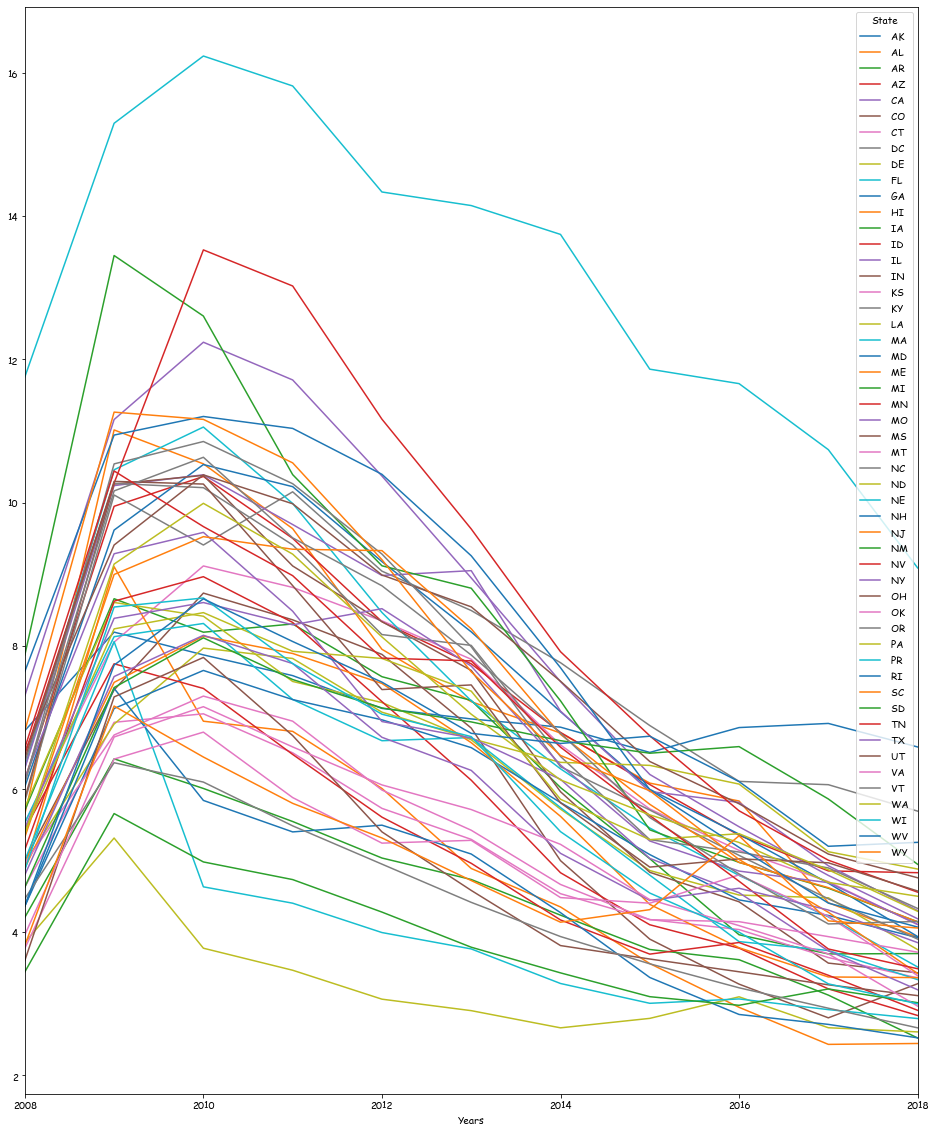

In [20]:
State_total_percentages_only_flipped.plot(figsize=(16, 20))

In [21]:

# Read in the data and drop Excel sheet comment blocks
hc_converage_2008_2018 = pd.read_excel('/Users/evahuang/Desktop/hic04_acs.xls', skiprows = [0, 1, 2]).dropna(thresh = 2)

# Prepare the headers by year and sub-section
years = list(range(2018, 2007, -1))

each_year_sub = ['Estimate_number', 'Margin_of_Error_number', 'Percentage', 'Margin_of_Error_percentage']

headers_for_hc_coverage_census = ['Nation/State', 'Coverage Type']

for each in years:
    for each_sub in each_year_sub:
        headers_for_hc_coverage_census.append(str(each) + '_' + each_sub)

# Assign headers to data
hc_converage_2008_2018.columns = headers_for_hc_coverage_census
hc_converage_2008_2018 = hc_converage_2008_2018[hc_converage_2008_2018['Coverage Type'].notna()].ffill(axis=0)
hc_converage_2008_2018

,Nation/State,Coverage Type,2018_Estimate_number,2018_Margin_of_Error_number,2018_Percentage,2018_Margin_of_Error_percentage,2017_Estimate_number,2017_Margin_of_Error_number,2017_Percentage,2017_Margin_of_Error_percentage,...,2010_Percentage,2010_Margin_of_Error_percentage,2009_Estimate_number,2009_Margin_of_Error_number,2009_Percentage,2009_Margin_of_Error_percentage,2008_Estimate_number,2008_Margin_of_Error_number,2008_Percentage,2008_Margin_of_Error_percentage
1,UNITED STATES,Total,322249,15,100.0,Z,320775,15,100,Z,...,100.0,Z,301472,23,100.0,Z,298571,20,100.0,Z
2,UNITED STATES,Any coverage,293684,178,91.1,0.1,292756,184,91.3,0.1,...,84.5,0.1,255807,235,84.9,0.1,255068,230,85.4,0.1
3,UNITED STATES,Uninsured,28566,183,8.9,0.1,28019,188,8.7,0.1,...,15.5,0.1,45665,238,15.1,0.1,43503,233,14.6,0.1
4,UNITED STATES,Private,217623,404,67.5,0.1,216952,419,67.6,0.1,...,65.8,0.1,203300,379,67.4,0.1,207786,353,69.6,0.1
5,UNITED STATES,..Employer-based,177740,354,55.2,0.1,176319,358,55,0.1,...,54.9,0.1,170633,310,56.6,0.1,175294,308,58.7,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,WYOMING,..TRICARE,23,4,4.1,0.6,20,3,3.6,0.6,...,3.7,0.7,21,3,3.9,0.5,20,3,3.8,0.6
569,WYOMING,Public,155,6,27.3,1,161,6,28.3,1.1,...,26.0,1.1,134,5,25.1,0.9,129,5,24.6,1
570,WYOMING,..Medicaid,58,5,10.3,0.9,69,6,12.2,1,...,12.8,1,64,5,12.0,0.9,60,5,11.4,0.9
571,WYOMING,..Medicare,102,3,18.0,0.4,98,2,17.3,0.4,...,13.3,0.4,73,2,13.7,0.5,70,2,13.5,0.3


In [22]:
hc_converage_2008_2018_estimate_percentages_only = hc_converage_2008_2018.iloc[0:, [0, 1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]]

# Inspect only the "Uninsured" percentage, including a nationwide one
hc_uninsured_perc = hc_converage_2008_2018_estimate_percentages_only[hc_converage_2008_2018_estimate_percentages_only['Coverage Type'] == 'Uninsured']
hc_uninsured_perc = hc_uninsured_perc.drop(['Coverage Type'], axis = 1).reset_index().drop(['index'], axis = 1).replace("N", np.nan).bfill(axis=1).astype(
    {'2018_Percentage': 'float64', 
     '2017_Percentage': 'float64',
     '2016_Percentage': 'float64',
     '2015_Percentage': 'float64',
     '2014_Percentage': 'float64',
     '2013_Percentage': 'float64',
     '2012_Percentage': 'float64',
     '2011_Percentage': 'float64',
     '2010_Percentage': 'float64',
     '2009_Percentage': 'float64',
     '2008_Percentage': 'float64'
    })
hc_uninsured_perc

,Nation/State,2018_Percentage,2017_Percentage,2016_Percentage,2015_Percentage,2014_Percentage,2013_Percentage,2012_Percentage,2011_Percentage,2010_Percentage,2009_Percentage,2008_Percentage
0,UNITED STATES,8.9,8.7,8.6,9.4,11.7,14.5,14.8,15.1,15.5,15.1,14.6
1,ALABAMA,10.0,9.4,9.1,10.1,12.1,13.6,13.3,14.3,14.6,13.8,13.3
2,ALASKA,12.6,13.7,14.0,14.9,17.2,18.5,20.5,20.1,19.9,21.1,19.1
3,ARIZONA,10.6,10.1,10.0,10.8,13.6,17.1,17.6,17.2,16.9,17.3,18.0
4,ARKANSAS,8.2,7.9,7.9,9.5,11.8,16.0,16.4,17.1,17.5,17.0,17.1
5,CALIFORNIA,7.2,7.2,7.3,8.6,12.4,17.2,17.9,18.1,18.5,18.0,17.3
6,COLORADO,7.5,7.5,7.5,8.1,10.3,14.1,14.7,15.1,15.9,15.8,16.7
7,CONNECTICUT,5.3,5.5,4.9,6.0,6.9,9.4,9.1,8.8,9.1,8.8,8.8
8,DELAWARE,5.7,5.7,5.7,5.9,7.8,9.1,8.8,9.4,9.7,10.2,10.0
9,DISTRICT OF COLUMBIA,3.2,3.8,3.9,3.8,5.3,6.7,5.9,6.9,7.6,7.0,7.6


In [23]:

# The same table, but flipped around

hc_uninsured_perc_flipped = hc_uninsured_perc.transpose().reset_index()
hc_uninsured_perc_flipped.columns = hc_uninsured_perc_flipped.iloc[0]
hc_uninsured_perc_flipped = hc_uninsured_perc_flipped.rename({'Nation/State': 'Years'}, axis=1)
hc_uninsured_perc_flipped = hc_uninsured_perc_flipped[1:].iloc[::-1].reset_index().drop(['index'], axis = 1)
hc_uninsured_perc_flipped['Years'] = hc_uninsured_perc_flipped['Years'].str.rstrip('egatnecreP_').astype({'Years': 'int'})
hc_uninsured_perc_flipped

,Years,UNITED STATES,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,2008,14.6,13.3,19.1,18,17.1,17.3,16.7,8.8,10,...,11.1,12.9,23.4,15,8.8,11.6,12.5,14.8,8.8,13.7
1,2009,15.1,13.8,21.1,17.3,17,18,15.8,8.8,10.2,...,13.1,14.3,23.8,14.6,8.6,11.9,13.4,14.2,9.4,15.2
2,2010,15.5,14.6,19.9,16.9,17.5,18.5,15.9,9.1,9.7,...,12.4,14.4,23.7,15.3,8,13.1,14.2,14.6,9.4,14.9
3,2011,15.1,14.3,20.1,17.2,17.1,18.1,15.1,8.8,9.4,...,11.9,14.6,23,15.3,6.6,12.5,14.2,14.9,9,15.4
4,2012,14.8,13.3,20.5,17.6,16.4,17.9,14.7,9.1,8.8,...,11.5,13.9,22.5,14.5,6.5,12.5,13.9,14.4,9,15.4
5,2013,14.5,13.6,18.5,17.1,16,17.2,14.1,9.4,9.1,...,11.3,13.9,22.1,14,7.2,12.3,14,14,9.1,13.4
6,2014,11.7,12.1,17.2,13.6,11.8,12.4,10.3,6.9,7.8,...,9.8,12,19.1,12.5,5,10.9,9.2,8.6,7.3,12
7,2015,9.4,10.1,14.9,10.8,9.5,8.6,8.1,6,5.9,...,10.2,10.3,17.1,10.5,3.8,9.1,6.6,6,5.7,11.5
8,2016,8.6,9.1,14,10,7.9,7.3,7.5,4.9,5.7,...,8.7,9,16.6,8.8,3.7,8.7,6,5.3,5.3,11.5
9,2017,8.7,9.4,13.7,10.1,7.9,7.2,7.5,5.5,5.7,...,9.1,9.5,17.3,9.2,4.6,8.8,6.1,6.1,5.4,12.3


Text(0, 0.5, 'Percentage of Uninsured People')

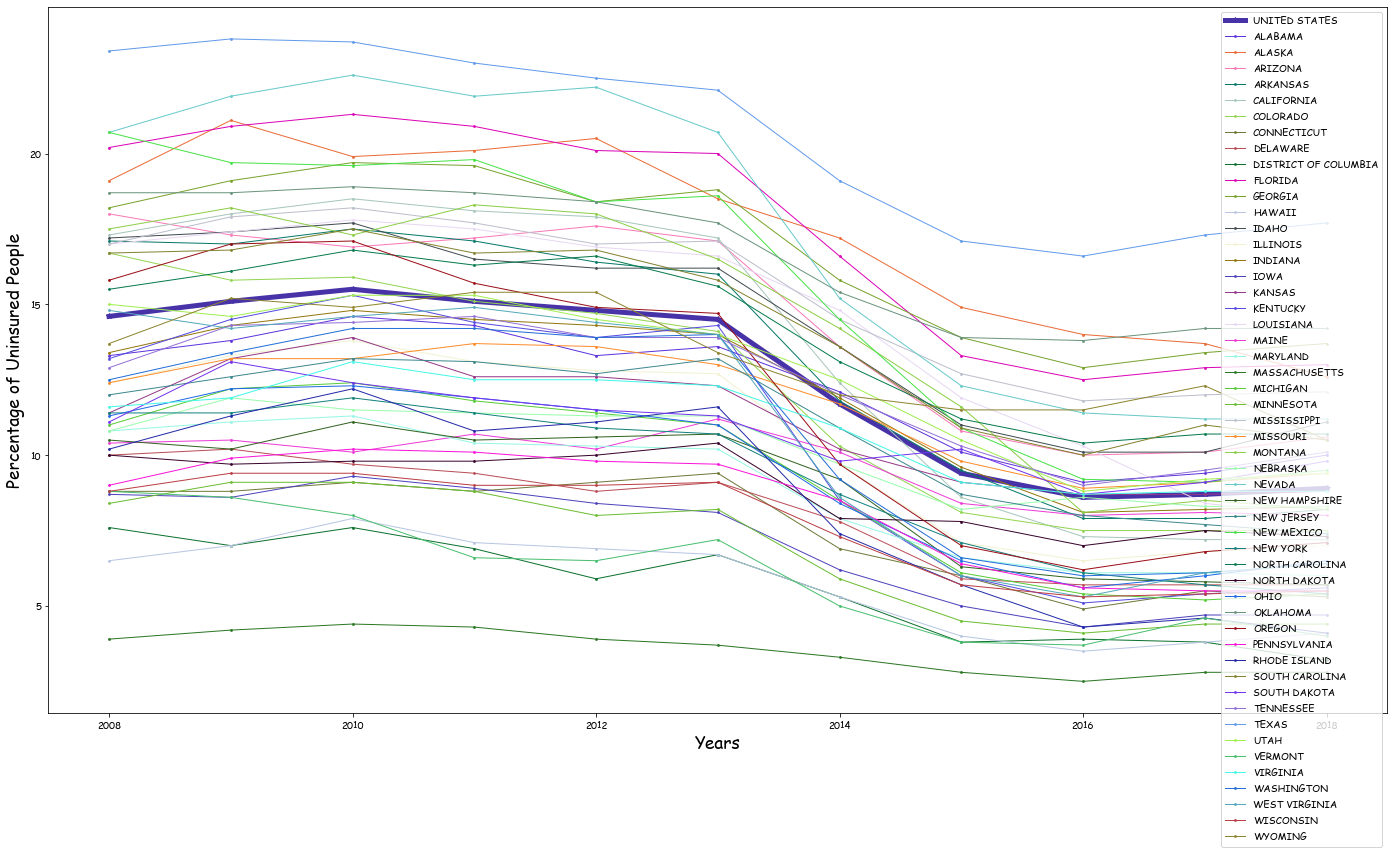

In [52]:
plt.figure(figsize=(24,13))
plt.plot( 'Years', 'UNITED STATES', data=hc_uninsured_perc_flipped, marker='*', color='#4832a8', linewidth=5)
for each_state in hc_uninsured_perc_flipped.columns[2:]:
    plt.plot( 'Years', each_state, data=hc_uninsured_perc_flipped, marker='p', markersize=2, color=(random.random(), random.random(), random.random()), linewidth=1)
plt.legend()
plt.xlabel('Years', fontsize = 'xx-large')
plt.ylabel('Percentage of Uninsured People', fontsize = 'xx-large')

In [61]:
# I can't merge or concat 2 tables

#plat_df = pd.merge(State_total_percentages_only_flipped , hc_uninsured_perc_flipped.iloc, on="Years", how="left")

#plat_df = pd.concat(State_total_percentages_only_flipped , hc_uninsured_perc_flipped,axis=0,join='outer',join_axes=None,ignore_index=False,keys=None,levels=None,names=None,verigy_integrity=False)
